In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

## 1.Load the file “zoo.data” and look at the info and first five rows. The first column denotes the animal name and the last one specifies a high-level class for the corresponding animal.

In [54]:
dat = pd.read_csv("zoo.csv")

In [55]:
dat.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [56]:
dat[dat["class_type"]==1]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1
10,cheetah,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
17,deer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
19,dolphin,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1


In [28]:
dat.sort_values(by = "class_type")

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
32,gorilla,1,0,0,1,0,0,0,1,1,1,0,0,2,0,0,1,1
35,hamster,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0,1
36,hare,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
44,leopard,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,crayfish,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7
46,lobster,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
85,starfish,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7


In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


## 2. Find out the unique number of high level class.

In [5]:
dat['class_type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

## 3. Use the 16-intermediate feature and perform an agglomerative clustering.
[ Hint: Refer to the agglomerative clustering module in scikit learn and set the number of clusters appropriately]

In [57]:
from sklearn.cluster import AgglomerativeClustering

In [58]:
clustering = AgglomerativeClustering(n_clusters=7)

In [59]:
X = dat.drop(["animal_name", "class_type"], axis=1)

In [60]:
clustering.fit(X)

AgglomerativeClustering(n_clusters=7)

In [61]:
clustering.labels_

array([1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 3, 2, 6, 0, 0, 3, 1, 2, 2, 3, 3,
       1, 3, 0, 5, 5, 4, 1, 4, 0, 1, 4, 3, 2, 1, 1, 3, 2, 0, 0, 3, 0, 3,
       1, 1, 0, 1, 1, 1, 1, 0, 5, 0, 1, 1, 3, 3, 3, 3, 2, 2, 6, 5, 1, 1,
       2, 1, 1, 1, 1, 3, 0, 2, 2, 4, 6, 6, 3, 3, 6, 6, 2, 3, 4, 0, 2, 3,
       0, 5, 5, 5, 2, 4, 1, 3, 4, 0, 1, 6, 3], dtype=int64)

In [62]:
clustering.labels_+1

array([2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 4, 3, 7, 1, 1, 4, 2, 3, 3, 4, 4,
       2, 4, 1, 6, 6, 5, 2, 5, 1, 2, 5, 4, 3, 2, 2, 4, 3, 1, 1, 4, 1, 4,
       2, 2, 1, 2, 2, 2, 2, 1, 6, 1, 2, 2, 4, 4, 4, 4, 3, 3, 7, 6, 2, 2,
       3, 2, 2, 2, 2, 4, 1, 3, 3, 5, 7, 7, 4, 4, 7, 7, 3, 4, 5, 1, 3, 4,
       1, 6, 6, 6, 3, 5, 2, 4, 5, 1, 2, 7, 4], dtype=int64)

C:\Users\vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

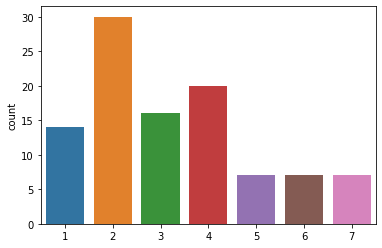

In [30]:
sns.countplot(clustering.labels_+1)

C:\Users\vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class_type', ylabel='count'>

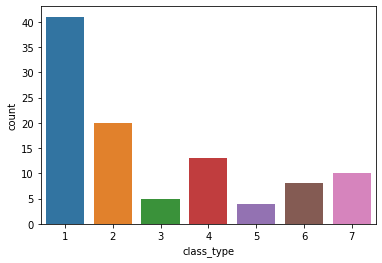

In [24]:
sns.countplot(dat["class_type"])

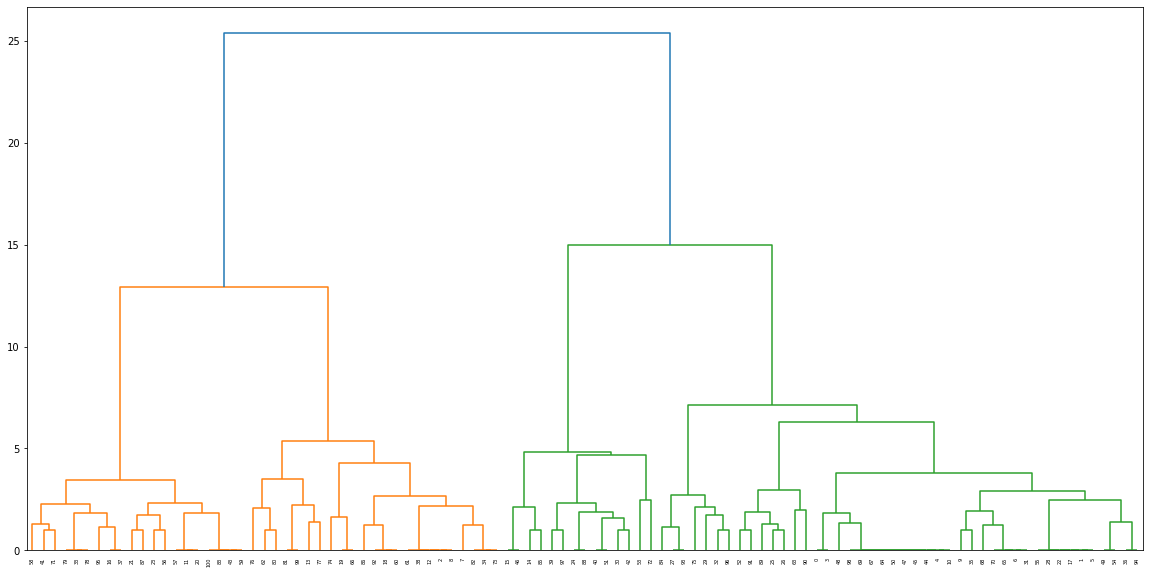

In [34]:
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [63]:
labels = clustering.labels_

In [65]:
X[labels==1]

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0
10,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
17,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
22,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1


In [50]:
predicted_class = pd.DataFrame(clustering.labels_, columns=["predicted_class"])

In [68]:
out = pd.concat([dat, predicted_class], axis =1)

In [69]:
out

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,predicted_class
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,2
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1,4
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6,0
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,6


<AxesSubplot:xlabel='class_type', ylabel='predicted_class'>

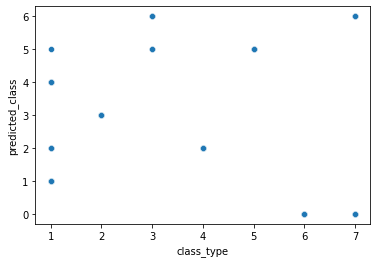

In [71]:
sns.scatterplot(data = out, x= "class_type", y = "predicted_class" )